# Team 6 - World Cup

![](https://img.fifa.com/image/upload/t_l4/v1543921822/ex1ksdevyxwsgu7rzdv6.jpg)

_For more information about the dataset, read [here](https://www.kaggle.com/abecklas/fifa-world-cup)._

## Your tasks
- Name your team!
- Read the source and do some quick research to understand more about the dataset and its topic
- Clean the data
- Perform Exploratory Data Analysis on the dataset
- Analyze the data more deeply and extract insights
- Visualize your analysis on Google Data Studio
- Present your works in front of the class and guests next Monday

## Submission Guide
- Create a Github repository for your project
- Upload the dataset (.csv file) and the Jupyter Notebook to your Github repository. In the Jupyter Notebook, **include the link to your Google Data Studio report**.
- Submit your works through this [Google Form](https://forms.gle/oxtXpGfS8JapVj3V8).

## Tips for Data Cleaning, Manipulation & Visualization
- Here are some of our tips for Data Cleaning, Manipulation & Visualization. [Click here](https://hackmd.io/cBNV7E6TT2WMliQC-GTw1A)

_____________________________

## Some Hints for This Dataset:
- Is there a way to integrate the data from all 3 datasets?
- It seems like the `winners` dataset doesn't have data of World Cup 2018. Can you Google the relevant information and add it to the dataset using `pandas`?
- The format of some number columns in `matches` dataset doesn't look right.
- Can you seperate the Date and the Time of `Datetime` column in `matches` dataset?
- And more...

In [9]:
# Start your codes here!
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
import pandas_profiling

In [0]:
#read file from drive
winners = pd.read_csv('/content/drive/My Drive/winners.csv')
players = pd.read_csv('/content/drive/My Drive/players.csv')
matches = pd.read_csv('/content/drive/My Drive/matches.csv')

Get info

In [12]:
#get winner's info
winners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
Year              20 non-null int64
Country           20 non-null object
Winner            20 non-null object
Runners-Up        20 non-null object
Third             20 non-null object
Fourth            20 non-null object
GoalsScored       20 non-null int64
QualifiedTeams    20 non-null int64
MatchesPlayed     20 non-null int64
Attendance        20 non-null object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [0]:
#convert Attendance field to float and fillna
winners['Attendance'] = winners['Attendance'].map(lambda x: x.replace('.',''))
winners['Attendance'] = pd.to_numeric(winners['Attendance'])
winners['Attendance'] = winners['Attendance'].astype(float)
winners['Attendance'].fillna(0,inplace=True)

In [14]:
winners.head(20)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549.0
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000.0
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700.0
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246.0
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768607.0
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819810.0
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172.0
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1563135.0
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1603975.0
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1865753.0


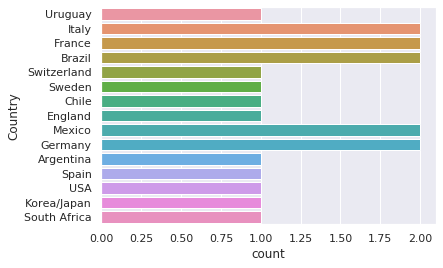

In [15]:
#plot country held
sns.countplot(y = 'Country', data =winners )

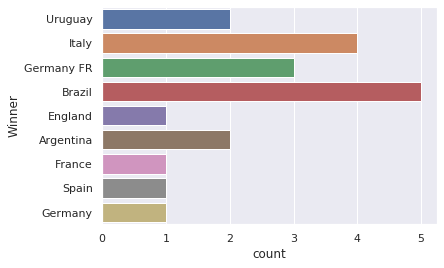

In [16]:
#plot the winners
sns.countplot(y = 'Winner', data =winners )

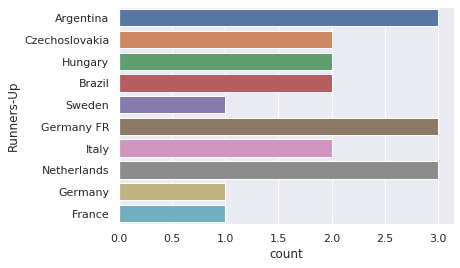

In [17]:
# plot the 2nd
sns.countplot(y = 'Runners-Up', data =winners )

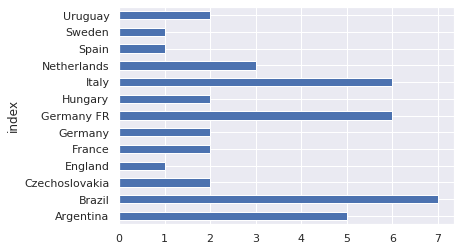

In [18]:
#calculate number attendance in final match
champions = pd.DataFrame(winners.Winner.value_counts().reset_index())
runners = pd.DataFrame(winners['Runners-Up'].value_counts().reset_index())
finals = pd.concat([champions,runners],sort=False)
finals = finals.groupby('index').sum()#.reset_index()
finals.fillna(0,inplace= True)
finals['finals'] = finals['Winner'] + finals['Runners-Up']
finals.finals.plot(kind='barh')

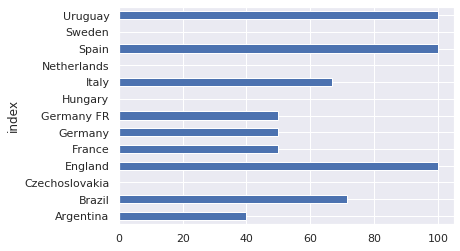

In [19]:
#plot winning rate in final match
finals['rate'] = finals['Winner']/finals['finals']*100
finals.rate.plot(kind='barh')

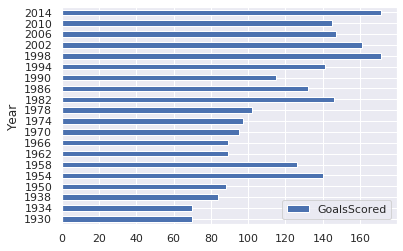

In [20]:
#plot total goals per year
winners.plot(x='Year',y='GoalsScored',kind='barh')

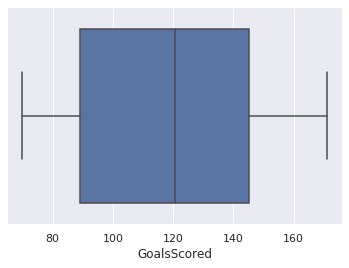

In [21]:
#plot boxplot of GoalsScored field
sns.boxplot(x=winners['GoalsScored'])

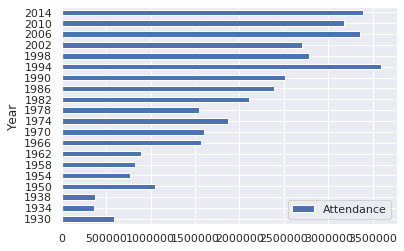

In [22]:
#plot attendance number per year
winners.plot(x='Year',y='Attendance',kind='barh')

In [23]:
# get player's info
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37784 entries, 0 to 37783
Data columns (total 9 columns):
RoundID          37784 non-null int64
MatchID          37784 non-null int64
Team Initials    37784 non-null object
Coach Name       37784 non-null object
Line-up          37784 non-null object
Shirt Number     37784 non-null int64
Player Name      37784 non-null object
Position         4143 non-null object
Event            9069 non-null object
dtypes: int64(3), object(6)
memory usage: 2.6+ MB


In [0]:
#clean data
players.drop(columns=['Shirt Number', 'Position','Event'], inplace=True)

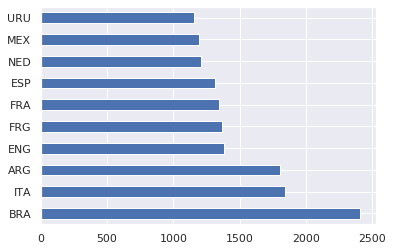

In [25]:
#plot match number per Team
players['Team Initials'].value_counts().head(10).plot(kind='barh')

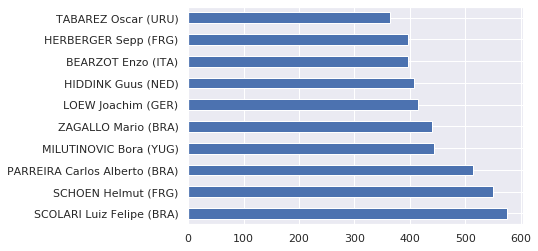

In [26]:
#plot match number per COACH
players['Coach Name'].value_counts().head(10).plot(kind='barh')

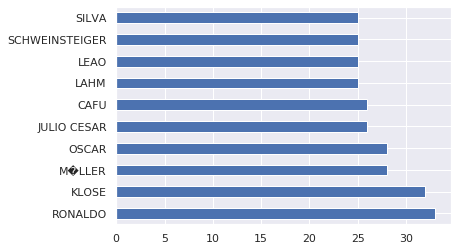

In [27]:
#plot match number per player
players['Player Name'].value_counts().head(10).plot(kind='barh')

In [28]:
#calculate match number of Portugal
players[players['Team Initials']=='POR']['Team Initials'].value_counts()

POR    589
Name: Team Initials, dtype: int64

In [29]:
#calculate match number of Cristiano Ronaldo
players[(players['Team Initials']=='POR') & (players['Player Name'] == 'RONALDO')]['Player Name'].value_counts()

RONALDO    7
Name: Player Name, dtype: int64

In [30]:
#get match's info
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
Year                    852 non-null float64
Datetime                852 non-null object
Stage                   852 non-null object
Stadium                 852 non-null object
City                    852 non-null object
Home Team Name          852 non-null object
Home Team Goals         852 non-null float64
Away Team Goals         852 non-null float64
Away Team Name          852 non-null object
Win conditions          852 non-null object
Attendance              850 non-null float64
Half-time Home Goals    852 non-null float64
Half-time Away Goals    852 non-null float64
Referee                 852 non-null object
Assistant 1             852 non-null object
Assistant 2             852 non-null object
RoundID                 852 non-null float64
MatchID                 852 non-null float64
Home Team Initials      852 non-null object
Away Team Initials      852 non-null object
dtype

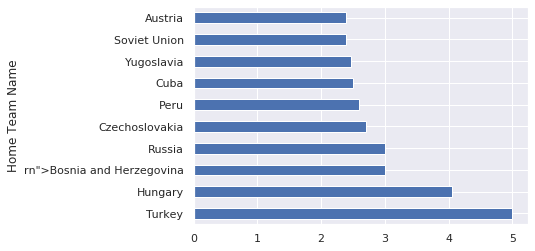

In [31]:
#plot mean top 10 goal number per Home Team
matches.groupby('Home Team Name')['Home Team Goals'].mean().sort_values(ascending=False).head(10).plot(kind='barh')

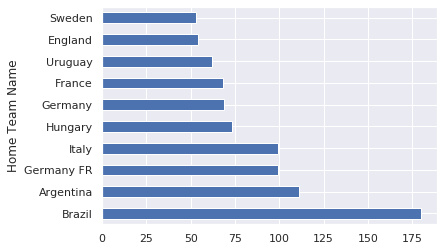

In [32]:
#plot sum top 10 goal number per Home Team
matches.groupby('Home Team Name')['Home Team Goals'].sum().sort_values(ascending=False).head(10).plot(kind='barh')

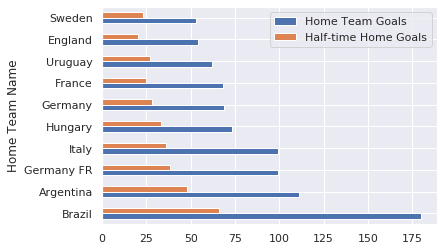

In [33]:
#plot top 10 goal number and goal in half-time per Home Team 
matches.groupby('Home Team Name')['Home Team Goals','Half-time Home Goals'].sum().sort_values(by= 'Home Team Goals',ascending=False).head(10).plot(kind='barh')

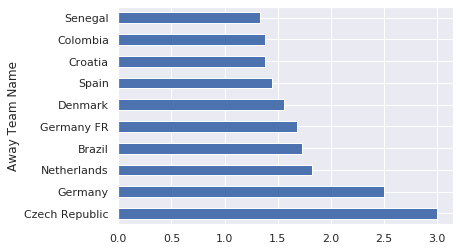

In [34]:
#plot mean top 10 goal number per Away Team
matches.groupby('Away Team Name')['Away Team Goals'].mean().sort_values(ascending=False).head(10).plot(kind='barh')

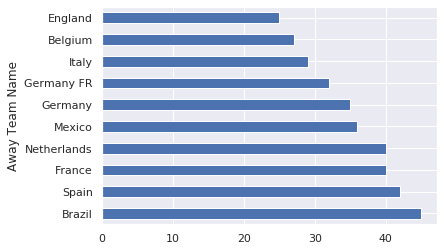

In [35]:
#plot sum top 10 goal number per Away Team
matches.groupby('Away Team Name')['Away Team Goals'].sum().sort_values(ascending=False).head(10).plot(kind='barh')

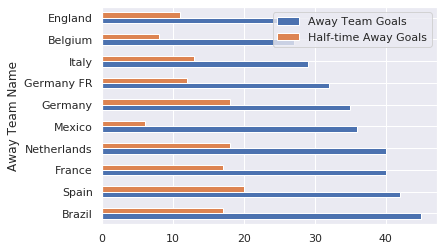

In [36]:
#plot top 10 goal number and goal in half-time per Away Team 
matches.groupby('Away Team Name')['Away Team Goals','Half-time Away Goals'].sum().sort_values(by= 'Away Team Goals',ascending=False).head(10).plot(kind='barh')

[DataStudio link](datastudio.google.com/reporting/1a5565a1-d26d-47de-af52-e2ee3055f040) **World Cup**
